# 0. Setup Paths

we'll set up some folder structures that we need to keep going.

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'sign_language_2nd_tuned' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    # to keep all of the directories related to our model, we need this.
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'), 
    
    # to keep generate_tfrecord.py file, we need this.
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    
    # to keep TFOD API directories, we need this.
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    
    # to keep test.record, train.record and label_map.pbtxt files, we need this.
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'), 
    
    # to keep our train and test images, we need this.
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'), 
    
    # to keep all our custom model, we need this.
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    
    # to keep all of the pre-trained models, we need this.
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    
    # to keep the CUSTOM_MODEL directories, checkpoints, and keep the pre-trained model pipeline, we need this. 
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME),
    
    # to keep the freezing graph of our custom model, we need this.
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    
    # to keep our custom model export formats, we need these.
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'),
    
    # to keep our custom the protoc directories, we need this.
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    # to copy the pre-trained model pipeline into the CHECKPOINT_PATH, we need this.
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    
    # to create generate_tfrecord.py, we need this.
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    
    # to create or update the label_map.pbtxt, we need this.
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

we haven't created `files` directories.

In [ ]:
# files

# 1.1. Install wget, protoc, TFOD API

the package wget allows us to pull down our model from [Tensorflow Model Zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md).

In [ ]:
if os.name=='nt':
    !pip install --use-pep517 wget
    import wget

we're going to clone the Tensorflow object detection repository to work with object detection stuff which is available in research/object_detection.

this repository refers tensorflow object detection API.

In [ ]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

because a lot of tensorflow object detection stuff uses somthing called protocol buffers, we have to install protoc package.

In [ ]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    # install protoc: to serialize structured data
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    
    # the os.pathsep indicates the character used to separate search paths.
    # os.path.abspath(path) returns a normalized version of the pathname path.
    # we add this .\\protoc\\bin path to the user's environmental variable temporarily.
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin')) 
    
    # install the officail Tensorflow Object Detection API
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

# 1.2. Verifying the TFOD API installation and install other required dependencies

to verify our installation, we should run the following script.

this will tell us whether or not we've actually got the tensorflow object detection api installed successfully
if it is installed successfully we'll see okay that means the tenesorflow object detection API is successfuly installed on our local machine.

if not we should follow next cells. 

__note:__ erverytime we restart the kernel, we should run this cell and get OK from this pop-up.

In [6]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2023-03-01 16:51:51.130665: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-03-01 16:51:51.130803: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-01 16:52:38.848042: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-03-01 16:52:38.849514: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2023-03-01 16:52:38.850947: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2023-03-01 16:52:38.852716: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

we need to install some dependencies required.

now we can see here that it's saying that there's no module named tensorflow so what we're going to do is run the
next line down here which actually installs tensorflow for us.

````python 
ModuleNotFoundError: No module named 'tensorflow'
````

In [ ]:
# !pip install tensorflow --upgrade

````python 
ModuleNotFoundError: No module named 'scipy'
````

In [ ]:
# !pip install scipy

````python
ModuleNotFoundError: No module named 'tensorflow_io'
````

In [ ]:
# !pip install tensorflow-io

````python 
ModuleNotFoundError: No module named 'matplotlib'
````

In [ ]:
# !pip uninstall protobuf matplotlib -y
# !pip install protobuf matplotlib==3.2

In [ ]:
# !pip install matplotlib

In [ ]:
# !pip install --upgrade protobuf==3.20.3

````python 
ModuleNotFoundError: No module named 'official'
````

In [ ]:
# !pip install tf-models-official

In [ ]:
# import sys

# sys.path.append('E:/Projects/Image Processing/Object_Detection/TFODCourse/Tensorflow/models')
# sys.path

# 1.3. Download TF Pretrained Models from Tensorflow Model Zoo

if we get an error like NO module named `object_detection`, we should restart our kernel.

In [7]:
import object_detection

because I'm using the Tensorflow 2.11.0, we should make sure that i have the perfect match of CUDA (11.2) and cuDNN (8.1) for that. to do that, we should checkout [this link](https://www.tensorflow.org/install/source_windows) and get the appropriate version of those from google.  

In [8]:
!pip list

Package                       Version              Editable project location
----------------------------- -------------------- ----------------------------------------------------------------------------------------
absl-py                       1.3.0
asttokens                     2.2.1
astunparse                    1.6.3
backcall                      0.2.0
cachetools                    5.2.0
certifi                       2022.12.7
charset-normalizer            2.1.1
colorama                      0.4.6
comm                          0.1.2
contourpy                     1.0.6
cycler                        0.11.0
Cython                        0.29.32
debugpy                       1.6.4
decorator                     5.1.1
dm-tree                       0.1.8
entrypoints                   0.4
executing                     1.2.0
flatbuffers                   23.1.4
flax                          0.3.3
fonttools                     4.38.0
gast                          0.4.0
gin-config          


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<br>
this code download our model from the Tensorflow model zoo.

why should we use Tensorflow Model Zoo to download TF Pretrained Models?
* one we can get a state-of-the-art architecture.
* and two we can leverage a technique called transfer learning. because of this techinque, our model not only can do some standard detections like detecting some generic objects such as a phone, a bottle, a towel and so forth, but only can detect custom objects with transfering knowledge.


In [ ]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL} # clone our model into the download file path
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']} # move it to the specific path
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'} # unzip it
    
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    # change directory and unzip the compress file
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

In [ ]:
# paths['PRETRAINED_MODEL_PATH']

# 2. Create or Update Label Map

a label map effectively represents a map of all our different labels.

In [9]:
labels = [{'name':'ThumbsUp', 'id':1}, {'name':'ThumbsDown', 'id':2}, {'name':'ThankYou', 'id':3},
          {'name':'LiveLong', 'id':4}, {'name':'Hello', 'id':5}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [ ]:
# files['LABELMAP']

# 3. Create or Update TF records

In [ ]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

this code creates a file format which is called a `generate_tfrecord.py` which is availabel to be used to train our object detection model. 

In [ ]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/amirho3einsedaghati/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [ ]:
# files['TF_RECORD_SCRIPT']

In [ ]:
# paths['SCRIPTS_PATH']

this file `converts annotations` in your images `into a record file` format that it can use. it happens by running the follwing code.

__note:__ if we included the incorrect name for labels which are in label map, we get KeyError after running this cell because the label we have picked for label map is not match with for each images. so we must make sure if we have picked correct label because it is case sensitive.

In [10]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record


Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


In [ ]:
# paths['IMAGE_PATH']

In [ ]:
# files['LABELMAP']

In [ ]:
# paths['ANNOTATION_PATH']

```python
ModuleNotFoundError: No module named 'pandas'
```

In [ ]:
# !pip install pandas 

# 4. Copy the .Config file of the pretrained model to Training Folder

the pipeline config controls what our model actually looks like and what the architecture it has.

this file gives us a baseline but we're going to customize it for our specific model.

In [11]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
    
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


In [ ]:
# paths['CHECKPOINT_PATH']

# 5. Update .Config For Transfer Learning

Step 5 is essential because we want to have our custom model, not a pre-trained model.

In [12]:
import tensorflow as tf
from object_detection.utils import config_util # to read and update configuration files
from object_detection.protos import pipeline_pb2 # to generate protocol buffer objects
from google.protobuf import text_format # Contains routines for printing protocol messages in text format.

In [13]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG']) # Load pipeline.config into a dictionary

In [ ]:
# files['PIPELINE_CONFIG']

In [14]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [15]:
print(type(config))

<class 'dict'>


after running the following cell, we can change whatever we want.

In [16]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig() # creates an object in form of a protocol message
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read() # creates a text of a protocol message
    text_format.Merge(text=proto_str, message=pipeline_config) # Parses a text of a protocol message into a protocol message.

In [17]:
print(type(proto_str)) 
print(type(pipeline_config))

print(type(text_format.Merge(proto_str, pipeline_config)))

<class 'str'>
<class 'object_detection.protos.pipeline_pb2.TrainEvalPipelineConfig'>
<class 'object_detection.protos.pipeline_pb2.TrainEvalPipelineConfig'>



we have __five__ strings in __pipeline_config__, `model`, `train_config`, `train_input_reader`, `eval_config`, and `eval_input_reader`.

now, we update the pipeline.config file by running this

In [19]:
# the number of classes so this represents the number of different types of objects we're going to use
pipeline_config.model.ssd.num_classes = len(labels)

# in each training epoch, we will have 4 rounds. in each round will use 67 images because I totally have 270 images
pipeline_config.train_config.batch_size = 4

pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')

pipeline_config.train_config.fine_tune_checkpoint_type = "detection"

pipeline_config.train_input_reader.label_map_path= files['LABELMAP']

pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]

pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']

pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [20]:
pipeline_config

model {
  ssd {
    num_classes: 5
    image_resizer {
      fixed_shape_resizer {
        height: 320
        width: 320
      }
    }
    feature_extractor {
      type: "ssd_mobilenet_v2_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 3.9999998989515007e-05
          }
        }
        initializer {
          random_normal_initializer {
            mean: 0.0
            stddev: 0.009999999776482582
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.996999979019165
          scale: true
          epsilon: 0.0010000000474974513
        }
      }
      use_depthwise: true
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
        additional_layer_depth: 128
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
 

finally, we should write the whole changes of pipeline_config on pipeline.config file.

In [21]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [22]:
proto_str == config_text

False

# 6. Train the custom model by using train records 

In [23]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [24]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=30000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [25]:
print(command) 

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\sign_language_2nd_tuned --pipeline_config_path=Tensorflow\workspace\models\sign_language_2nd_tuned\pipeline.config --num_train_steps=30000


<br>
We can train our model using this code here, but if we want to see the training progress of our model in real time, we should run the code outside of a notebook, inside of a command prompt window. 

after running this cell inside of a command prompt window, we get an output after 100 steps. this output includes per-step time and loss metrics and we can see that the checkpoint files are generated in the CUSTOM_MODEL_NAME folder of the root library. 

after the training process of our model completes, we'll have some checkpoint files, in this case that means 3 checkpoint files, in the mentioned folder. that means the model completely trained and our trained model is inside checkpoint files. 
</br>

__note:__ ideally, we wanted the loss metrics as low as possible, and the mean average precision and recall as high as possible.

if we have installed `CUDA`, `cuDNN`, and the perfect match of TensorFlow-GPU on our virtual environment, after running this, the system is leveraged the amount of GPU memory to train our model.

__note:__ after training model, we get a new folder named train in the my_ssd_mobnet folder.

We can run the content of the 'command' variable here, or run it into a command prompt. 

In [ ]:
!{command}

# 7. Evaluate the custom-trained Model by using test records

In [26]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [27]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\sign_language_2nd_tuned --pipeline_config_path=Tensorflow\workspace\models\sign_language_2nd_tuned\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\sign_language_2nd_tuned


after runnig this code in a notebook or a command prompt window, we get all of the performance (or evaluation) metrics (average precision, average recall and loss) for our trained model. 

__note:__ after evaluation model, we get a new folder named eval in the my_ssd_mobnet folder.

In [ ]:
!{command}

# 8. Detecting Objects

# 8.1. Load the Trained Model From the last Checkpoint

in step 8.1 and 8.2, we're going to detect an object with an image. it'll also useful in order to detect an object from a cloud provider because cloud services like google colab don't have access to any sensor like a webcam or a microscope and can't detect objects real time. 

In [28]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util # Reads a label map and returns a dictionary of label names to id
from object_detection.utils import visualization_utils as viz_utils # Contains a set of functions that are used for visualization
from object_detection.builders import model_builder # one of usage of it is in the building of detection models 
from object_detection.utils import config_util # to read and update configuration files

In [29]:
# Load pipeline.config into a dictionary
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

# build a detection model
detection_model = model_builder.build(model_config=configs['model'], is_training=False)


# first we create a checkpoint object for detection_model, and finally, restore the last checkpoint of our trained model. 
# ----
# the checkpoint that we have created manages one trackable object called model.
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
# S1
ckpt.restore(tf.train.latest_checkpoint(paths['CHECKPOINT_PATH'])).expect_partial() 
# S2
# we use the last checkpoint to restore/load our trained model.
# ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-41')).expect_partial() 

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image) # extracts image features
    prediction_dict = detection_model.predict(image, shapes) # predicts unpostprocessed tensors
    detections = detection_model.postprocess(prediction_dict, shapes) # Converts prediction/unpostprocessed tensors to final detections.
    return detections

In [ ]:
# files['PIPELINE_CONFIG']

In [ ]:
# configs['model']

In [30]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [31]:
NUM_CLASSES = pipeline_config.model.ssd.num_classes
label_map = label_map_util.load_labelmap(files['LABELMAP'])
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
category_index 

{1: {'id': 1, 'name': 'ThumbsUp'},
 2: {'id': 2, 'name': 'ThumbsDown'},
 3: {'id': 3, 'name': 'ThankYou'},
 4: {'id': 4, 'name': 'LiveLong'},
 5: {'id': 5, 'name': 'Hello'}}

In [32]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'hello.46d90cab-b61a-11ed-893a-083e8e873c2d.jpg')

# 8.2. Detect from an Image

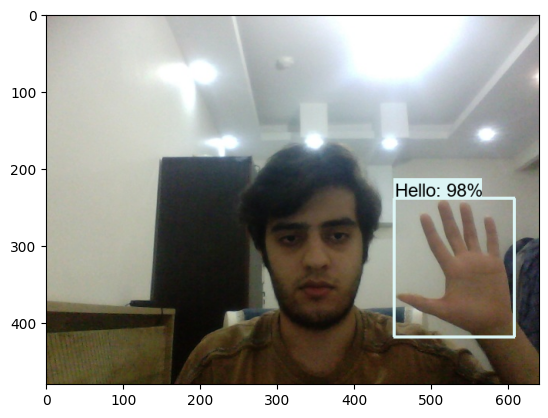

In [33]:
# Loads an image from a file
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor) # returns a dictionary including our required keys for detecting objects

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image=image_np_with_detections,
            # boxes are nested arrays each one of those arrays have four values
            # and those represent the cordinate of boxes.
            boxes=detections['detection_boxes'],
            classes=detections['detection_classes']+label_id_offset,
            # scores are a sorted array with the highest confidence value at the top.
            scores=detections['detection_scores'],
            category_index= category_index,
            use_normalized_coordinates=True,
            # these two parameters max_boxes_to_draw and minimum_score_thresh help us to tun our model detections.
            # they define the level of detection accuracy in model detections.
            max_boxes_to_draw=5,
            min_score_thresh=.8, # I'm not going to show anything that has a detection accuracy of less than 80 %
            agnostic_mode=False)

# Converts an image from one color space to another
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 8.3. Real-Time Detections from the Webcam

in this step, we're going to detect an object using webcam real time.

In [ ]:
# !pip uninstall opencv-python-headless -y

In [34]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()
        
    viz_utils.visualize_boxes_and_labels_on_image_array(
                image=image_np_with_detections,
                boxes=detections['detection_boxes'],
                classes=detections['detection_classes']+label_id_offset,
                scores=detections['detection_scores'],
                category_index= category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=2,
                # increasing confidence threshold produces higher precision and lower recall.
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 9. Freezing the Graph

In [ ]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [ ]:
print(command)

By freezing our graph, we can save a slice of our model for use next time. or we can share it with someone else.

In [ ]:
!{command}

# 10. Conversion:

# 10.1. Conversion to TFJS

we can use the TFJS model to build a web application.

to create a TFJS file, we should install tensorflowjs converter.

'tensorflowjs_converter' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!pip install tensorflowjs

In [ ]:
!pip show tensorflowjs

In [ ]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 10.2. Conversion to TFLite

the TFLite format is typically used in mobile applications and machines that can't be running a full version of Tensorflow Object Detection.

we can use the TFLite model to build a web application or to work with a Raspberry Pi.

In [ ]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [ ]:
print(command)

first, we export the TFLite graph of our model by using this.

In [ ]:
!{command}

In [ ]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [ ]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
print(command)

And then we can run this code to convert our model to TFLite format by the TFLite converter.

In [ ]:
!{command}

# 11. Zip and Export the custom model folder 

create and export our custom model in the root directory.

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
# We can mount (or install) our Google Drive contents at the specified path of our our colab account.
drive.mount('/content/drive')